## Exercise 08 : Seaborn ##

## Imports ##

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

## Task #
Иногда в предыдущих задачах мы игнорировали project1 в расчетах. Это был конкурс с более длинными дедлайнами и большим количеством коммитов, чем у обычных лабораторных. Давайте посмотрим динамику коммитов в этом проекте по пользователям. На этот раз мы воспользуемся другой библиотекой для визуализации данных в Python — Seaborn. В целом, с её помощью проще создавать красивые графики.

Сделайте всё необходимое, чтобы создать график, похожий на Readme.

* анализировать только пользователей, не администраторов
* учитывать только логи из таблицы checker со статусом ready
* выбрать любую цветовую палитру на ваш вкус
* толщина линий — 3
* фон графика — серый
* высота — 10, ширина — в 1.5 раза больше высоты
* размер шрифта заголовка — 30
* размер шрифтов названий осей — 15
* в конце Jupyter Notebook создать markdown‑ячейку и вставить вопросы (ответы дать, глядя только на графики):
  * «Кто был лидером по количеству коммитов почти всё время?» Ответ: user_*.
  * «Кто был лидером лишь короткое время?» Ответ: user_*.

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
df = pd.read_sql('SELECT * FROM checker WHERE uid LIKE "user%" AND labname="project1" AND status="ready"', conn, parse_dates=['timestamp']) 
df['date'] = df['timestamp'].dt.date
commit_counts = df.groupby(['uid', 'timestamp']).size().to_frame('commit_count').reset_index()
commit_counts = commit_counts.sort_values(['uid', 'timestamp'])

In [4]:
users = commit_counts['uid'].unique()
commit_counts['cum_commit_count'] = commit_counts.groupby('uid')['commit_count'].cumsum()

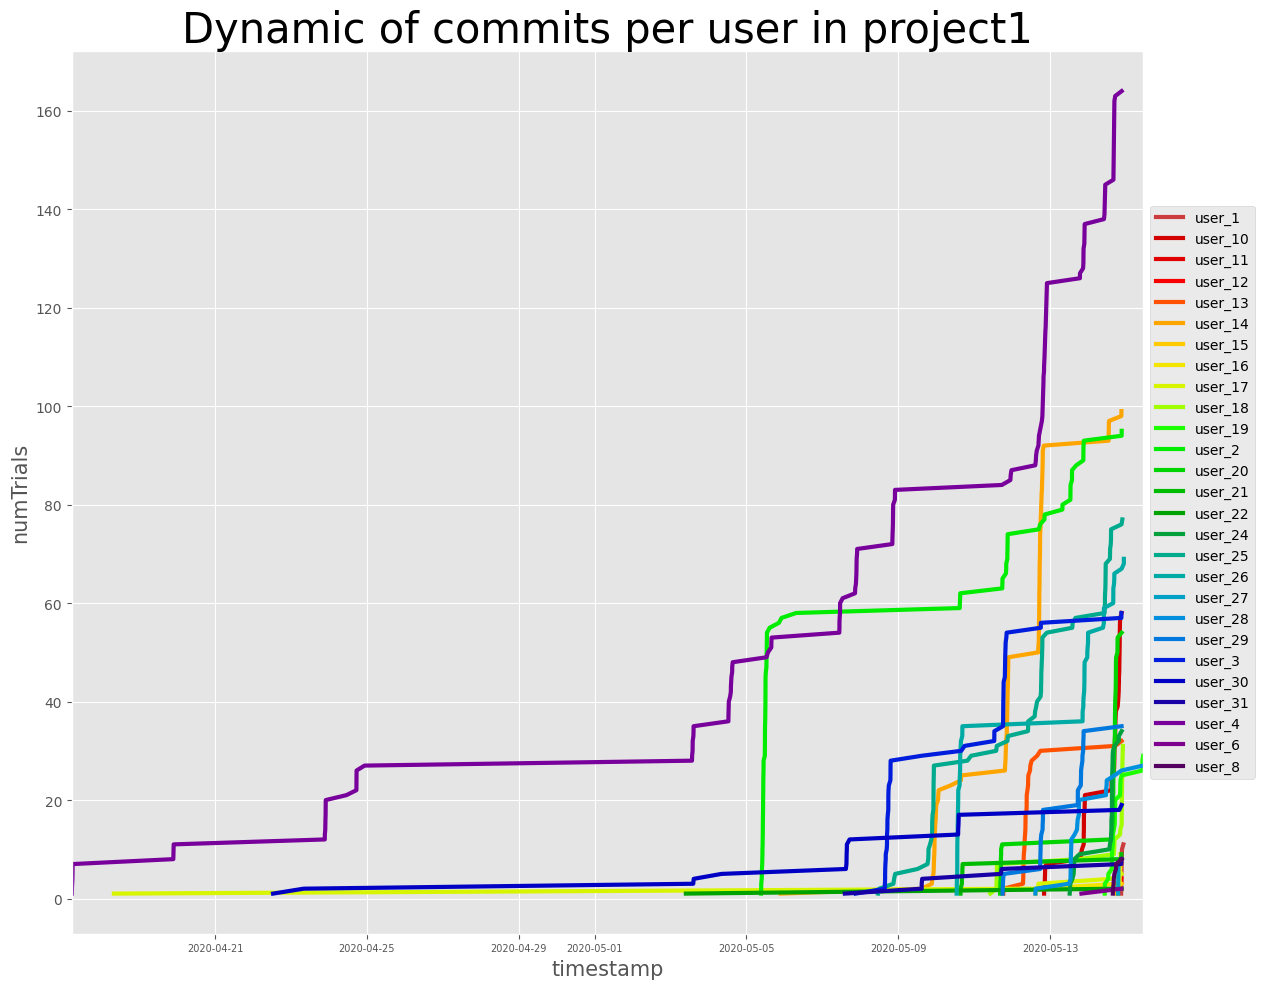

In [5]:
height = 10
width = height * 1.5

plt.figure(figsize=(width, height))
plt.style.use('ggplot')
ax = plt.gca()

palette = sns.color_palette("nipy_spectral", n_colors=len(users))
palette.reverse()

for idx, user in enumerate(users):
    user_data = commit_counts[commit_counts['uid'] == user]
    user_data = user_data.sort_values('timestamp')
    sns.lineplot(
        x='timestamp',
        y='cum_commit_count',
        data=user_data,
        ax=ax,
        linewidth=3,
        label=user,
        color=palette[idx],
    )

plt.title('Dynamic of commits per user in project1', fontsize=30)
ax.set_xlabel('timestamp', fontsize=15)
ax.set_ylabel('numTrials', fontsize=15)
plt.xticks(fontsize=7)

ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

min_date = commit_counts['timestamp'].min()
ax.set_xlim((min_date, commit_counts['timestamp'].max()))

plt.tight_layout(rect=(0,0,0.85,1))
plt.show()

In [6]:
conn.close()

  * «Кто был лидером по количеству коммитов почти всё время?» Ответ: user_4.
  * «Кто был лидером лишь короткое время?» Ответ: user_2.